# Quick start to KinFragLib

How to load and use the KinFragLib fragment library?

## Table of contents

1. Access fragment library
2. View all fragments for Gefitinib
3. Identify most common fragments in the AP subpocket

## Installation

- Download repository and install conda environment ([instructions](https://github.com/volkamerlab/kinfraglib#quick-start))
- To use this notebook: [Download notebook](https://gist.github.com/dominiquesydow/48b6a850d935ccf4d15906b79a4b1817) and save to `KinFragLib/notebooks` folder

## Imports

In [1]:
from pathlib import Path

from rdkit import Chem
from rdkit.Chem import Draw, PandasTools

from kinfraglib import utils

# Needed to display ROMol images in DataFrames
PandasTools.RenderImagesInAllDataFrames(images=True)

## 1. Access fragment library

Load the fragment library and access the subpocket fragment pools.

Example: AP subpocket

### Load the fragment library

In [2]:
PATH_TO_LIB = Path("./../../data/fragment_library")

In [3]:
fragment_library = utils.read_fragment_library(PATH_TO_LIB)
fragment_library.keys()

dict_keys(['AP', 'FP', 'SE', 'GA', 'B1', 'B2', 'X'])

`fragment_library` is a dictionary containing a `pandas` DataFrame for each of the six subpockets (AP, FP, SE, GA, B1, B2) and the pool X.

### Access fragments in AP subpocket

In [4]:
ap_fragments = fragment_library["AP"]
print(f"Number of fragments in AP: {ap_fragments.shape[0]}")

Number of fragments in AP: 2561


,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
0,,,,AAK1,NAK,Other,5l4q,LKB,B,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP F...,16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na,Nc1c[nH]c2ncccc12,[11*]c1cnc2[nH]cc(N[27*])c2c1,AP
1,,,,AAK1,NAK,Other,5te0,XIN,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 ...,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,[12*]N/C(=C1\C(=O)Nc2cc([20*])ccc21)c1ccccc1,AP

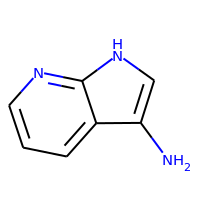
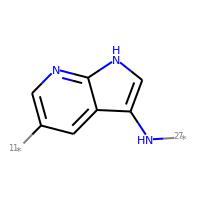
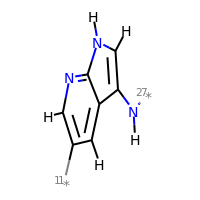
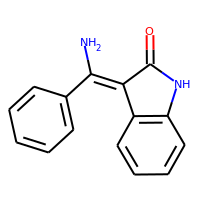
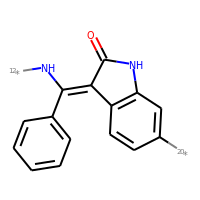
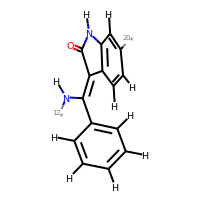

In [5]:
ap_fragments.head(2)

### Draw AP fragment examples

In [6]:
ap_fragments_examples = ap_fragments[:5]
legends = ap_fragments_examples["complex_pdb"].to_list() 
mols_wo_dummy = ap_fragments_examples["ROMol"].to_list()
mols_w_dummy = ap_fragments_examples["ROMol_dummy"].to_list()

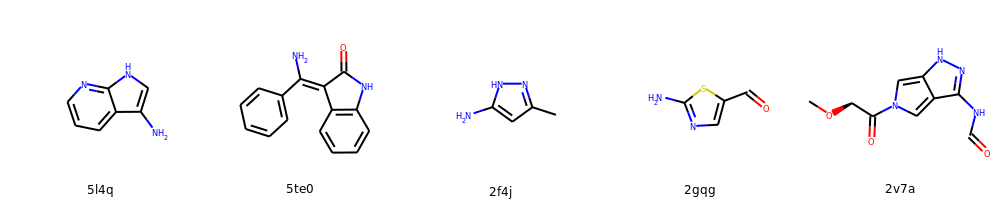

In [7]:
Draw.MolsToGridImage(mols=mols_wo_dummy, legends=legends, molsPerRow=5)

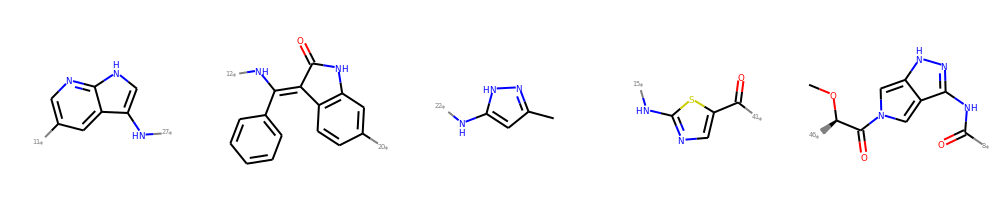

In [8]:
Draw.MolsToGridImage(mols=mols_w_dummy, molsPerRow=5)

## 2. View all fragments for Gefitinib (IRE)

Investigate how different orientations/binding modes of the same molecules co-crystallized to different structures affect the subpocket assignment.

### Find IRE fragments in each subpocket

In [9]:
ire_fragments = utils.get_fragments_by_ligand("IRE", fragment_library)
print(f"Number of fragments from IRE ligands: {ire_fragments.shape[0]}")

Number of fragments from IRE ligands: 30


In [10]:
ire_kinases = ire_fragments["kinase"].unique()
print("Kinases the ligand bind to:")
print(*ire_kinases)

Kinases the ligand bind to:
EGFR GAK


In [11]:
ire_pdbs = ire_fragments["complex_pdb"].unique()
print("Ligand co-crystallized in structures with PDB IDs:")
print(*ire_pdbs)

Ligand co-crystallized in structures with PDB IDs:
2ito 2ity 2itz 3ug2 4i22 4wkq 5y7z 5y80


### Draw example ligand fragmentation

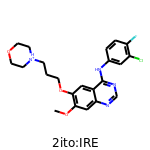

In [12]:
utils.draw_ligands_from_pdb_ids("2ito", "IRE")

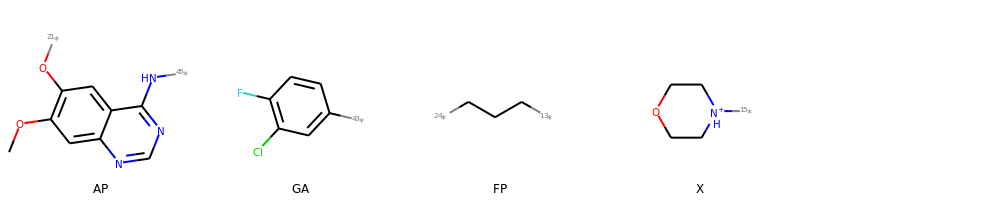

In [13]:
utils.draw_fragmented_ligand(
    fragment_library, "2ito", "IRE", mols_per_row=5, include_dummy=True
)

### Compare IRE fragmentation in different complexes

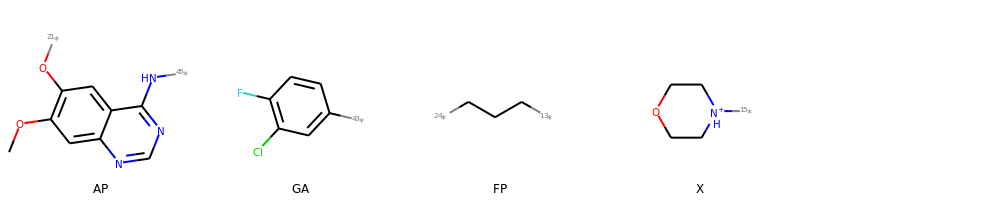

In [14]:
# Examples: 2ito, 2ity, 4i22, 4wkq, 5y80
utils.draw_fragmented_ligand(
    fragment_library, "2ito", "IRE", mols_per_row=5, include_dummy=True
)

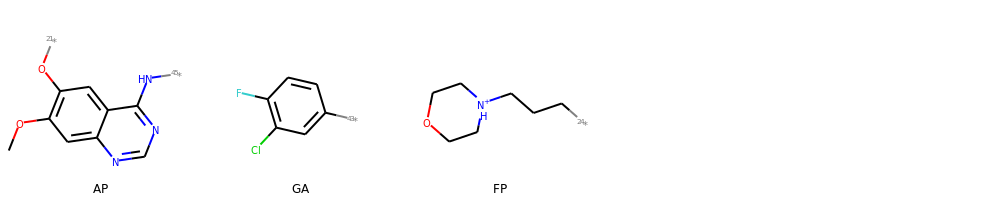

In [15]:
# Example: 2itz
utils.draw_fragmented_ligand(
    fragment_library, "2itz", "IRE", mols_per_row=5, include_dummy=True
)

## 3. Identify most common fragments in the AP subpocket

### Get most common AP fragments

In [16]:
most_common_fragments_df = utils.get_most_common_fragments(ap_fragments, top_x=10)

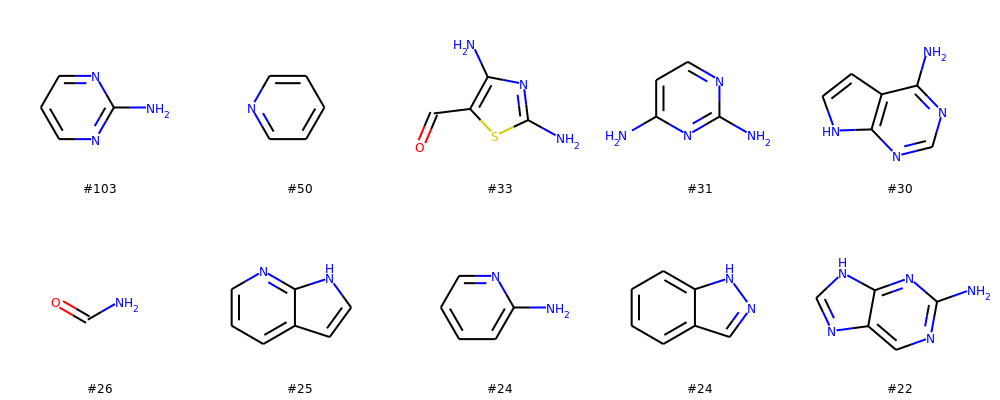

In [17]:
mols = most_common_fragments_df["ROMol"]
legends = [f"#{x}" for x in most_common_fragments_df["fragment_count"]]
Draw.MolsToGridImage(mols=mols, legends=legends, molsPerRow=5)

### Analyze the occurences of the most common AP fragment

Select the most common AP fragment.

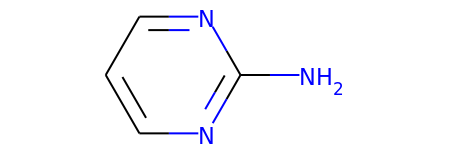

In [18]:
query_mol = most_common_fragments_df["ROMol"][0]
query_mol

In [19]:
ap_fragments_examples = ap_fragments[
    ap_fragments["smiles"] == Chem.MolToSmiles(query_mol)
]
print(f"Number fragments: {ap_fragments_examples.shape[0]}")

Number fragments: 103


,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
46,,,,ALK,ALK,TK,4dce,0JF,,A,AP AP AP AP AP AP AP AP AP AP FP SE,5 5 14 14 14 14 14 14 14 14 na na,Nc1ncccn1,[22*]Nc1nccc([33*])n1,AP
47,,,,ALK,ALK,TK,4fnz,NZF,,A,AP AP AP AP AP AP AP AP AP AP FP SE,5 5 14 14 14 14 14 14 14 14 na na,Nc1ncccn1,[22*]Nc1nccc([33*])n1,AP
75,,,,ALK2,STKR,TKL,6acr,9TO,,B,AP AP AP AP AP AP AP AP AP AP SE FP,14 14 14 14 14 14 5 5 14 14 na na,Nc1ncccn1,[21*]Nc1nccc([28*])n1,AP
201,,,,BRAF,RAF,TKL,4xv2,P06,,A,AP AP AP AP AP AP AP AP AP AP AP FP,14 14 14 14 14 14 14 14 5 5 5 na,Nc1ncccn1,[11*]c1ccnc(N)n1,AP
202,,,,BRAF,RAF,TKL,4xv3,P02,,A,AP AP AP AP AP AP AP AP AP AP AP FP,5 5 5 14 14 14 14 14 14 14 14 na,Nc1ncccn1,[21*]c1ccnc(N)n1,AP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,,,,TYK2,JakA,TK,6dbk,G5D,,A,AP AP AP AP AP AP AP AP AP AP FP SE,14 14 14 5 5 14 14 14 14 14 na na,Nc1ncccn1,*c1ccnc(N[9*])n1,AP
2381,,,,TYK2,JakA,TK,6dbm,G4J,B,A,AP AP AP AP AP AP AP AP AP AP FP SE,5 5 14 14 14 14 14 14 14 14 na na,Nc1ncccn1,[26*]Nc1nccc([29*])n1,AP
2445,,,,p38a,MAPK,CMGC,1bl7,SB4,,A,AP AP AP AP AP AP AP AP AP AP AP GA,14 14 14 14 14 14 14 14 5 5 5 na,Nc1ncccn1,[44*]c1ccnc(N)n1,AP
2446,,,,p38a,MAPK,CMGC,1bmk,SB5,,A,AP AP AP AP AP AP AP AP AP AP AP GA,14 14 14 14 14 14 14 14 5 5 5 na,Nc1ncccn1,[23*]c1ccnc(N)n1,AP

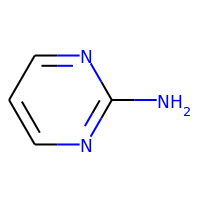
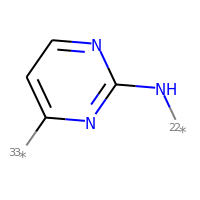
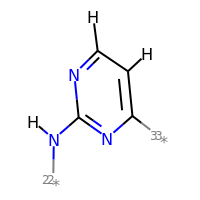
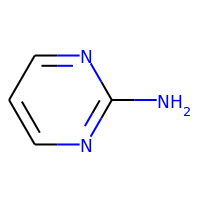
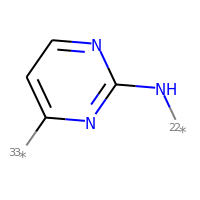
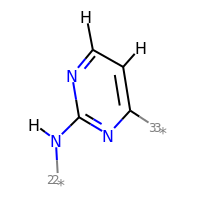
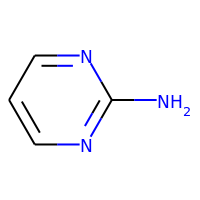
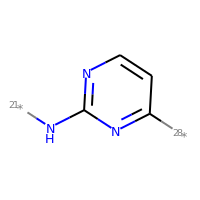
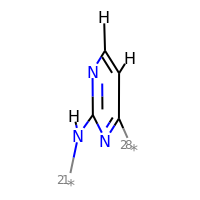
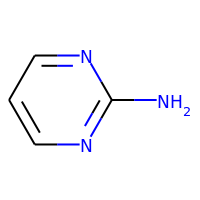
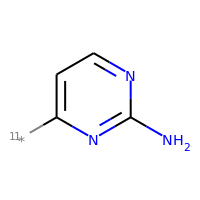
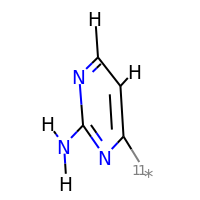
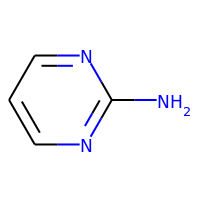
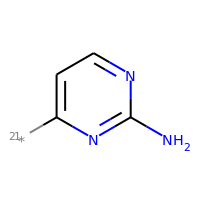
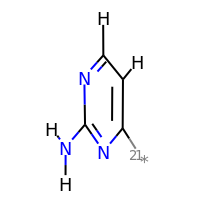
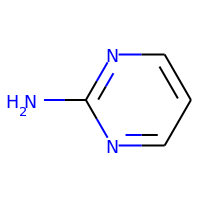
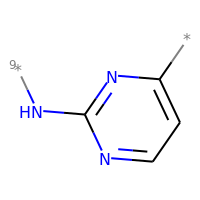
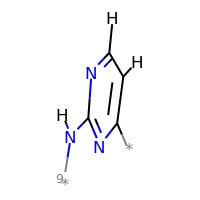
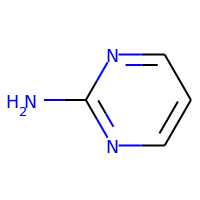
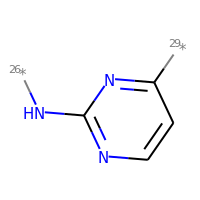
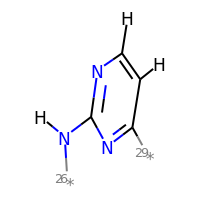
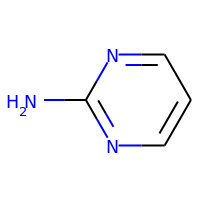
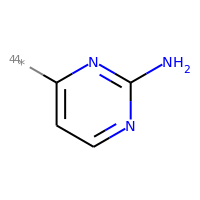
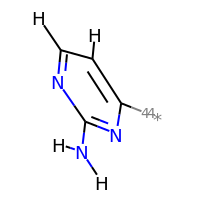
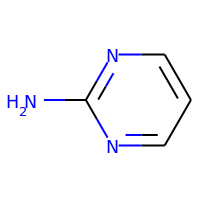
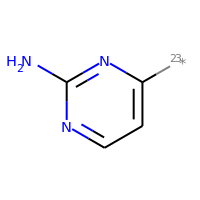
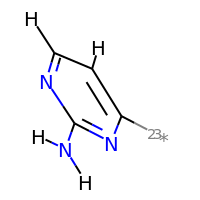
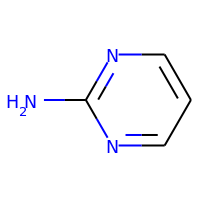
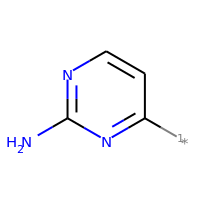
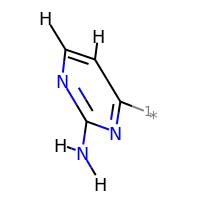

In [20]:
ap_fragments_examples

In [21]:
print("Example kinase-ligand complex:")
print(*ap_fragments_examples[["complex_pdb", "ligand_pdb"]].iloc[0])

Example kinase-ligand complex:
4dce 0JF


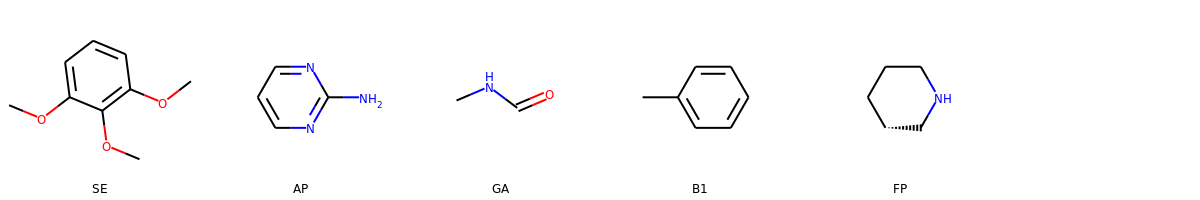

In [22]:
utils.draw_fragmented_ligand(fragment_library, "4dce", "0JF", mols_per_row=6)

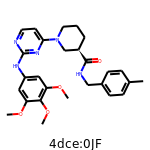

In [23]:
utils.draw_ligands_from_pdb_ids("4dce", "0JF")

In [24]:
print("Example kinase-ligand complex:")
print(*ap_fragments_examples[["complex_pdb", "ligand_pdb"]].iloc[3])
# Dabrafenib

Example kinase-ligand complex:
4xv2 P06


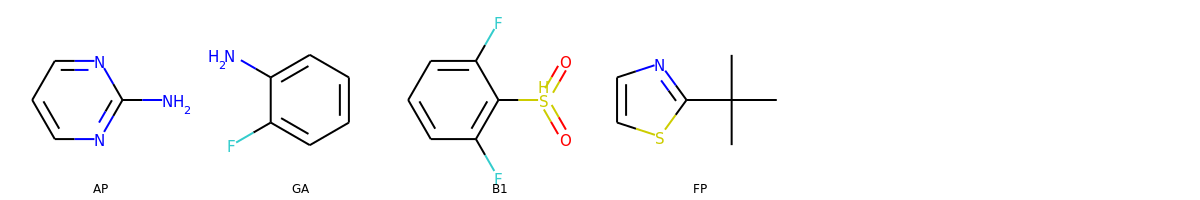

In [25]:
utils.draw_fragmented_ligand(fragment_library, "4xv2", "P06", mols_per_row=6)

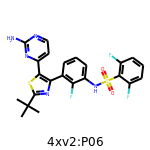

In [26]:
utils.draw_ligands_from_pdb_ids("4xv2", "P06")  

## Acknowledgements

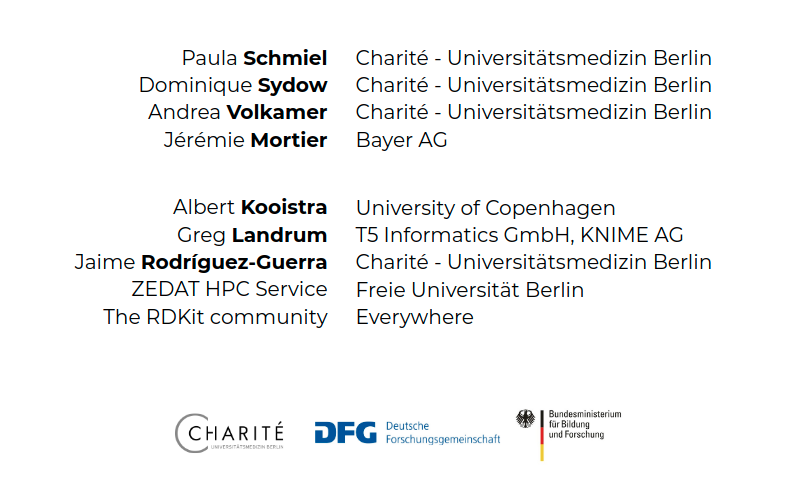


## Thank you for your attention!